# Practice with Blue Screen

In this practice notebook we would practice understanding the color channel conventions of OpenCV and replace the background of an object in an image.

In [402]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [403]:
# Read the color image and inspect the image
melon: np.ndarray = cv2.imread('.\included_images\melon.png')
print(f'Shape of melon image: {melon.shape}')
print(f'Data type of melon image: {melon.dtype}')
print(f'Min pixel intensity: {np.amin(melon)}')
print(f'Max pixel intensity: {np.amax(melon)}')

Shape of melon image: (1027, 1267, 3)
Data type of melon image: uint8
Min pixel intensity: 0
Max pixel intensity: 255


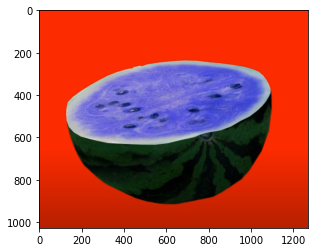

In [404]:
# Plot the melon image
plt.imshow(melon)

This is not, how we expected the melon image to show up. What happened here, is a misrepresentation of the color channels between OpenCV and Matplotlib. OpenCV reads the images in BGR color channel order for historical reasons, where as Matplotlib being more modern library expects the color channels to be RGB. This is evident from, how the background is showing up in the above image. We know, that the last color channel is blue according to Matplotlib, which is the original background color, but OpenCV has read it as red. Hence Matplotlib is showing the wrong colors. We can fix this with the `cvtColor` function.

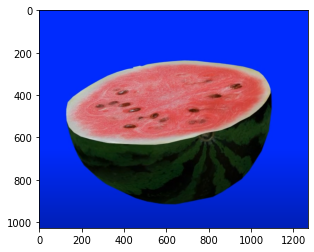

In [405]:
# Fix the color channel confusion
melon_rgb: np.ndarray = cv2.cvtColor(melon, cv2.COLOR_BGR2RGB)
# Plot the channel order corrected image
plt.imshow(melon_rgb)

## Threshold and change background using mask

Now the image is being plotted with expected order of the color channels. We want to use color threshold and change the background of the image with masking.

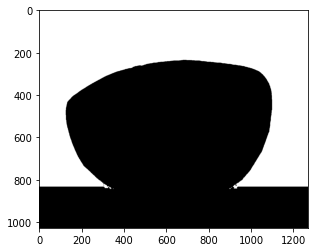

In [406]:
# Create a mask using some lowe and upper bound for the blue color. 
# In order to create a mask we would have to provide values for all three color channels in RGB order
lower_bound: np.ndarray = np.array([0, 0, 220])
upper_bound: np.ndarray = np.array([50, 50, 255])
mask: np.ndarray = cv2.inRange(melon_rgb, lowerb=lower_bound, upperb=upper_bound)
# Visualize the mask
plt.imshow(mask, cmap='gray')

We are seeing, that the mask is not quite accurate. It is because towards the lower part of the image we have darker tone to the blue. Hence we have to adjust the lower bound of our mask to allow some lower intensities for blue. Let's try again.

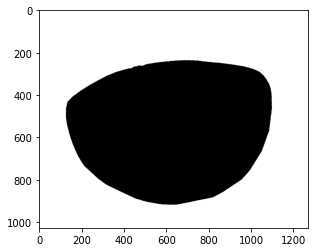

In [407]:
lower_bound: np.ndarray = np.array([0, 0, 180])
upper_bound: np.ndarray = np.array([50, 50, 255])
mask: np.ndarray = cv2.inRange(melon_rgb, lowerb=lower_bound, upperb=upper_bound)
# Visualize the mask
plt.imshow(mask, cmap='gray')

We tried quite a few values for the lower bound and the mask above looks accurate. Now we can go ahead and filter our image with this binary mask. Binary mask is just yet another image in this case, which is having the value 255 for the region we are masking for i.e., in this case the blue region, and having value 0 everywhere else.


In [408]:
print(f'Shape of the mask: {mask.shape}')
# Mask is a 2-dimensional array. When we apply the mask to a three color channel image, it is broadcast to all the channels

Shape of the mask: (1027, 1267)


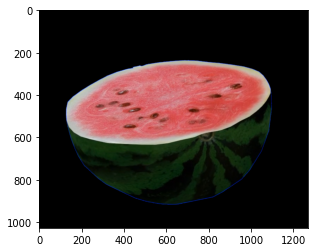

In [409]:
# Use the mask to filter out only the melon
masked_melon: np.ndarray = melon_rgb.copy()
masked_melon[mask != 0] = [0, 0, 0]
plt.imshow(masked_melon)

So we see above, that the mask is applied on the image and we have isolated the object of our interest. Now just for fun we want to apply a more interesting background to the mask. First the mask would be applied to the background image to make the space ready for the object.

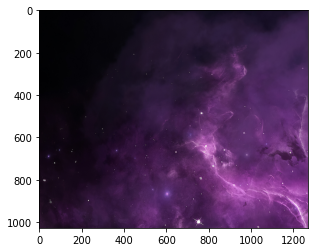

In [410]:
background: np.ndarray = cv2.imread('.\included_images\space.jpg')
background: np.ndarray = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background: np.ndarray = background[:melon_rgb.shape[0], :melon_rgb.shape[1], :]
plt.imshow(background)



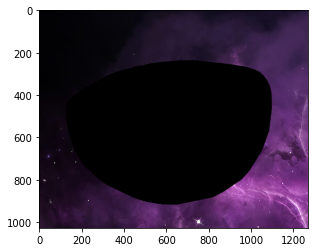

In [411]:
# Now apply the mask on the background image
masked_background: np.ndarray = background.copy()
masked_background[mask == 0] = [0, 0, 0]
plt.imshow(masked_background)

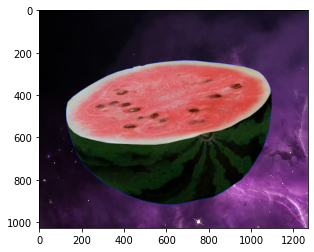

In [412]:
# And now in order to apply the new background to the original image, only thing we need to do is to add up the masked image (where we have isolated the object of interest) and the masked background.
# This works because with respect to the object of interest these two images are opposite of each other. In the masked image we allow only the potion of the object and in masked background we allow 
# only the portion of the background. The unnecessary parts in case of both images are masked with 0 values. Hence when we add them both the intended pixel intensities add up and fall into their places.
melon_in_space: np.ndarray = masked_melon + masked_background
plt.imshow(melon_in_space)

And we now have changed the background of the melon with color threshold and masking. Let's apply this strategy for masking to another image just for practice.

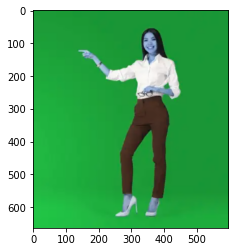

In [413]:
# Import image, fix the color channel dilemma and visualize
green: np.ndarray = cv2.imread('.\included_images\green.png')
plt.imshow(green)

This image in a bit interesting. In our original image the background is green and in both BGR and RGB conventions green channel is in the middle. Hence there less room for confusion between OpenCV and Matplotlib. But still we see, that several other colors are messed up because of reg and blue channels. We fix that again with the `cvtColor`.

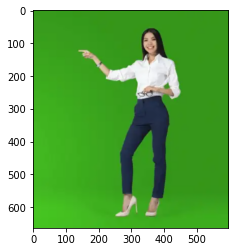

In [414]:
green: np.ndarray = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
plt.imshow(green)

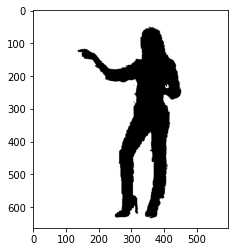

In [415]:
# Create mask for the original image with color thresholds
lower_bound: np.ndarray = np.array([0, 120, 0])
upper_bound: np.ndarray = np.array([80, 255, 40])
mask: np.ndarray = cv2.inRange(green, lowerb=lower_bound, upperb=upper_bound)
plt.imshow(mask, cmap='gray')

As we see above, in order to create approximately right mask, we had to adjust the upper and lower bounds of the individual color channels quite a bit, compared to the previous case. A single approach most likely does not work for all cases. Now we isolate the object.

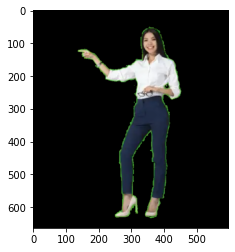

In [416]:
masked_girl: np.ndarray = green.copy()
masked_girl[mask != 0] = [0, 0, 0]
plt.imshow(masked_girl)

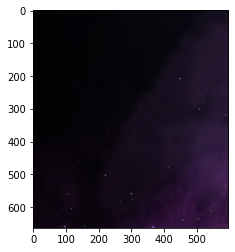

In [417]:
# Import the background and prepare for masking
background: np.ndarray = cv2.imread('.\included_images\space.jpg')
background: np.ndarray = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background: np.ndarray = background[:green.shape[0], :green.shape[1], :]
plt.imshow(background)

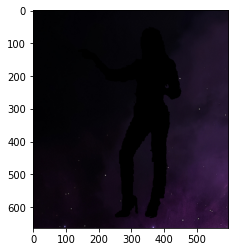

In [418]:
# Apply mask to the background
masked_background: np.ndarray = background.copy()
masked_background[mask == 0] = [0, 0, 0]
plt.imshow(masked_background)

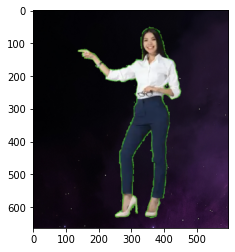

In [419]:
# Apply the new background
girl_in_space: np.ndarray = masked_girl + masked_background
plt.imshow(girl_in_space)


As we can see, like the previous image this one is not a perfect blending. Because our masking is not perfect and in certain cases it is very hard to make it perfect.